<a href="https://colab.research.google.com/github/MilaPotanina/ML/blob/main/%D0%9F%D0%BE%D1%82%D0%B0%D0%BD%D0%B8%D0%BD%D0%B0_%D0%A0_%D0%9A%D0%B5%D0%B9%D1%811.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
#загрузка файлов
dfAUS=pd.read_csv('/content/en_AUS_AllYears_WITS_Trade_Summary.CSV')
dfBEL=pd.read_csv('/content/en_BEL_AllYears_WITS_Trade_Summary.CSV')
dfBOL=pd.read_csv('/content/en_BOL_AllYears_WITS_Trade_Summary.CSV')
dfBRA=pd.read_csv('/content/en_BRA_AllYears_WITS_Trade_Summary.CSV')
dfCHN=pd.read_csv('/content/en_CHN_AllYears_WITS_Trade_Summary.CSV')
dfITA=pd.read_csv('/content/en_ITA_AllYears_WITS_Trade_Summary.CSV')
dfKOR=pd.read_csv('/content/en_KOR_AllYears_WITS_Trade_Summary.CSV')
dfRUS=pd.read_csv('/content/en_RUS_AllYears_WITS_Trade_Summary.CSV')
dfTUR=pd.read_csv('/content/en_TUR_AllYears_WITS_Trade_Summary.CSV')
dfUSA=pd.read_csv('/content/en_USA_AllYears_WITS_Trade_Summary.CSV')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#объединение датасетов в один
df = pd.concat([dfAUS, dfBEL, dfBOL, dfBRA, dfCHN, dfITA, dfKOR, dfRUS, dfTUR, dfUSA], axis = 0)

1. Предобработка данных

In [4]:
#вывод строк для первичной оценки
print(df.head(10))

    Reporter  Partner Product categories Indicator Type  \
0  Australia      ...                ...    Development   
1  Australia      ...                ...         Export   
2  Australia      ...                ...         Export   
3  Australia      ...                ...         Import   
4  Australia      ...                ...         Import   
5  Australia      ...                ...         Tariff   
6  Australia      ...                ...    Development   
7  Australia    China       All Products         Export   
8  Australia    China       All Products         Import   
9  Australia  Germany       All Products         Import   

                              Indicator        2019        2018        2017  \
0                 GDP (current US$ Mil)  1396570.00  1432880.00  1329190.00   
1                No. Of Export partners      211.00      213.00      212.00   
2                No. Of Export products     4188.00     4178.00     4171.00   
3                No. Of Import par

In [ ]:
#вывод описания для первичной оценки
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1112 entries, 0 to 99
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Reporter            1112 non-null   object 
 1   Partner             1112 non-null   object 
 2   Product categories  1112 non-null   object 
 3   Indicator Type      1112 non-null   object 
 4   Indicator           1112 non-null   object 
 5   2019                928 non-null    float64
 6   2018                938 non-null    float64
 7   2017                938 non-null    float64
 8   2016                938 non-null    float64
 9   2015                938 non-null    float64
 10  2014                928 non-null    float64
 11  2013                928 non-null    float64
 12  2012                918 non-null    float64
 13  2011                938 non-null    float64
 14  2010                938 non-null    float64
 15  2009                936 non-null    float64
 16  2008         

In [ ]:
#вывод числа пустых строк для первичной оценки
df.isnull().sum()

,0
Reporter,0
Partner,0
Product categories,0
Indicator Type,0
Indicator,0
2019,184
2018,174
2017,174
2016,174
2015,174


In [ ]:
#вывод описания датасета
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2019,928.0,3.441933e+06,5.996708e+07,-610470.00,5.7275,40.825,22914.7575,1.539416e+09
2018,938.0,3.558212e+06,5.884426e+07,-609460.00,5.4650,40.055,23222.9425,1.586927e+09
2017,938.0,3.055422e+06,5.059601e+07,-555530.00,5.9325,39.810,21537.9850,1.412415e+09
2016,938.0,3.206297e+06,5.409052e+07,-512520.00,5.7900,39.395,19677.7075,1.405617e+09
2015,938.0,3.420507e+06,5.513902e+07,-526570.00,5.7325,41.590,19013.1500,1.422905e+09
2014,928.0,3.578326e+06,5.930043e+07,-507659.94,6.0250,42.990,24341.2000,1.459457e+09
2013,928.0,2.504251e+06,4.645637e+07,-490779.97,6.0450,42.515,24916.2350,1.373604e+09
2012,918.0,2.367484e+06,4.591745e+07,-568569.89,6.3400,42.045,24524.8475,1.355684e+09
2011,938.0,3.445106e+06,5.434886e+07,-579460.01,6.9525,38.400,23862.1825,1.361387e+09
2010,938.0,2.902823e+06,4.641704e+07,-513899.89,6.6425,39.030,19442.1150,1.199067e+09


In [ ]:
#проверка на дубли
duplicate_count = df.duplicated().sum()
print("Количество дубликатов в датасете:", duplicate_count)

Количество дубликатов в датасете: 0


In [5]:
#заменим пропуски в категориальных данных на Nan
df['Partner'] = df['Partner'].replace('', np.nan)
df['Product categories'] = df['Product categories'].replace('', np.nan)


In [6]:
# В данных много пропусков. Воспользуемся методом KNNImputer, чтобы заполнить пропуски максимально релевантными данными, соответствующими тренду.
# Данные, для которых не прослеживается тренд, удалим.
# Есть гипотеза, что тренд будет эффективнее отследить на периодах, когда страны начали торговые отношения (то есть до этого года данных об импорте и экспорте нет)
# Выделим год, когда появляются данные об импорте и экспорте для каждой пары стран, остальные периоды удалим.

#Определяем колонки, которые являются годами
years = [col for col in df.columns if col.isdigit()]
years = sorted(years, key=int)  # Сортируем годы по возрастанию

In [7]:
def get_first_trade_year(row):
    # Получаем значения по годам для текущей строки
    trade_values = row[years]
    # Ищем первый год, в котором есть ненулевое или ненулевое значение
    for year in years:
        value = trade_values[year]
        if pd.notnull(value) and value != 0:
            return int(year)
    return None

In [8]:
# Применяем функцию к каждой строке
df['FirstTradeYear'] = df.apply(get_first_trade_year, axis=1)

# Просмотр результатов
print(df[['Reporter', 'Partner', 'FirstTradeYear']].head())

    Reporter Partner  FirstTradeYear
0  Australia     ...          1988.0
1  Australia     ...          1988.0
2  Australia     ...          1988.0
3  Australia     ...          1988.0
4  Australia     ...          1988.0


In [9]:
for index, row in df.iterrows():
    first_year = row['FirstTradeYear']
    if pd.notnull(first_year):
        # Определяем индексы годов до года начала торговли
        years_before_trade = [year for year in years if int(year) < first_year]
        # Обнуляем значения до года начала торговли
        df.loc[index, years_before_trade] = np.nan


In [10]:
# Выбираем числовые колонки для импутации
numeric_cols = years

# Создаем копию данных для импутации
df_impute = df.copy()

In [11]:
# Создаем экземпляр KNNImputer
imputer = KNNImputer(n_neighbors=8)

# Применяем импутацию к числовым данным
imputed_values = imputer.fit_transform(df_impute[numeric_cols])

# Обновляем данные после импутации
df_impute[numeric_cols] = imputed_values

In [12]:
# Считаем количество пропусков по строкам в исходных данных
df['MissingPercentage'] = df[numeric_cols].isnull().mean(axis=1)

# Определяем порог для удаления строк (80% пропусков)
threshold = 0.8

# Фильтруем строки с пропусками менее 80%
df_filtered = df[df['MissingPercentage'] <= threshold].copy()

# Соответственно фильтруем данные после импутации
df_impute_filtered = df_impute.loc[df_filtered.index]

In [13]:
# проверка на дубли
duplicate_count = df_impute_filtered.duplicated().sum()
print("Количество дубликатов в датасете:", duplicate_count)


Количество дубликатов в датасете: 6724


In [14]:
#удаление дублей
df_impute_filtered.drop_duplicates(inplace=True)
duplicate_count = df_impute_filtered.duplicated().sum()
df_impute_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
2019,902.0,1.462594e+06,3.179997e+07,-610470.00,5.665000,53.475000,28374.617500,9.506374e+08
2018,902.0,1.479603e+06,2.714807e+07,-609460.00,5.450000,54.280000,28569.585000,7.770999e+08
2017,902.0,1.180884e+06,1.966191e+07,-555530.00,5.842500,51.395000,26661.465000,5.372458e+08
2016,902.0,1.286271e+06,2.817472e+07,-512520.00,5.752500,47.570000,24290.792500,8.359103e+08
2015,902.0,1.472332e+06,2.927217e+07,-526570.00,5.680000,52.330000,24436.500000,8.401258e+08
2014,902.0,1.666101e+06,3.476448e+07,-507659.94,5.647500,54.750000,28042.952500,1.016208e+09
2013,902.0,3.894954e+05,5.624939e+06,-490779.97,5.790000,53.515000,28158.112500,1.414725e+08
2012,902.0,2.766468e+05,4.783173e+06,-568569.89,5.891563,53.180000,27297.877812,1.412489e+08
2011,902.0,1.318796e+06,3.011131e+07,-579460.01,6.680000,51.880000,26895.632500,8.910138e+08
2010,902.0,1.058895e+06,2.394328e+07,-513899.89,6.486250,51.852500,22255.735000,7.073460e+08


2. Проверка предобработанных данных

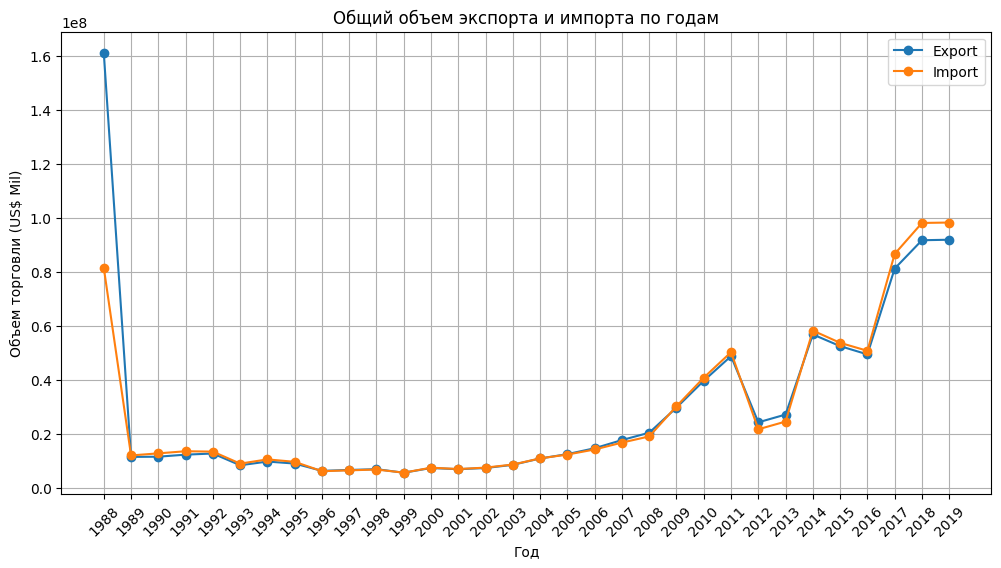

In [15]:
# Фильтруем данные
df_trade = df_impute_filtered[df_impute_filtered['Indicator Type'].isin(['Import', 'Export'])].copy()

# Суммируем данные по годам
trade_summary = df_trade.groupby('Indicator Type')[years].sum().transpose()

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(trade_summary.index, trade_summary['Export'], label='Export', marker='o')
plt.plot(trade_summary.index, trade_summary['Import'], label='Import', marker='o')
plt.title('Общий объем экспорта и импорта по годам')
plt.xlabel('Год')
plt.ylabel('Объем торговли (US$ Mil)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# выходные данные оказались несоответствующими реальности. Объемы импорта и экспорта могут снижаться в период 2008-2009 годов и 2014-2016 годов, а также объемы импорта и экспорта в 1988 не могут превышать значения объемов после 2000 года.
# Воспользуемся методом KNNImputer без выделения года, когда страны начали торговые отношения.

In [16]:
# Определяем колонки, которые являются годами
years = [col for col in df.columns if col.isdigit()]
years = sorted(years)


In [17]:
# Преобразуем данные в колонках годов в числовой формат
df[years] = df[years].apply(pd.to_numeric, errors='coerce')


In [18]:
# Вычисляем процент пропусков в каждой строке
df['MissingPercentage'] = df[years].isnull().mean(axis=1)

# Удаляем строки с более чем 80% пропусков
threshold = 0.8
df = df[df['MissingPercentage'] <= threshold].copy()

df.drop(columns=['MissingPercentage'], inplace=True)


In [19]:
# Создаем экземпляр KNNImputer
imputer = KNNImputer(n_neighbors=8)

# Применяем импутацию к годовым данным
df_imputed_new = df.copy()
df_imputed_new[years] = imputer.fit_transform(df[years])


In [20]:
df_imputed_new.describe().T

,count,mean,std,min,25%,50%,75%,max
2019,807.0,1.399216e+06,3.358886e+07,-610470.00,5.390000,36.21000,16781.720000,9.506374e+08
2018,807.0,1.454340e+06,2.869737e+07,-609460.00,5.135000,35.95000,17677.325000,7.770999e+08
2017,807.0,1.144853e+06,2.078175e+07,-555530.00,5.680000,34.75000,16247.630000,5.372458e+08
2016,807.0,1.346114e+06,2.978713e+07,-512520.00,5.510000,35.30000,13411.935000,8.359103e+08
2015,807.0,1.548145e+06,3.094704e+07,-526570.00,5.315000,37.65000,14160.465000,8.401258e+08
2014,807.0,1.758006e+06,3.675386e+07,-507659.94,5.351250,38.15000,16541.315000,1.016208e+09
2013,807.0,4.125226e+05,5.946422e+06,-490779.97,5.425000,36.22000,17601.015000,1.414725e+08
2012,807.0,2.934068e+05,5.057551e+06,-568569.89,5.680000,36.72000,18122.240000,1.412489e+08
2011,807.0,1.387863e+06,3.183475e+07,-579460.01,6.405000,34.11000,17244.480000,8.910138e+08
2010,807.0,1.114460e+06,2.531366e+07,-513899.89,6.340000,35.00000,15033.025000,7.073460e+08


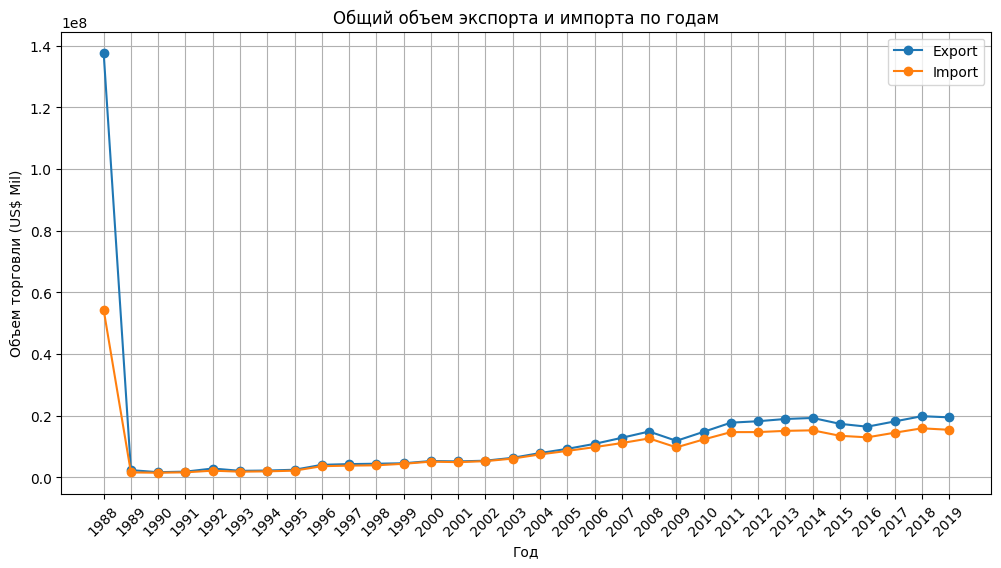

In [21]:
# Фильтруем данные
df_trade = df_imputed_new[df_imputed_new['Indicator Type'].isin(['Import', 'Export'])].copy()

# Суммируем данные по годам
trade_summary = df_trade.groupby('Indicator Type')[years].sum().transpose()

# Строим график
plt.figure(figsize=(12, 6))
plt.plot(trade_summary.index, trade_summary['Export'], label='Export', marker='o')
plt.plot(trade_summary.index, trade_summary['Import'], label='Import', marker='o')
plt.title('Общий объем экспорта и импорта по годам')
plt.xlabel('Год')
plt.ylabel('Объем торговли (US$ Mil)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [22]:
# Данные за 1988 год кажутся выбросами, для дальнейшего анализа они будут удалены из датасета
# Обновляем список годов
years = [col for col in df.columns if col.isdigit() and int(col) >= 1989]
years = sorted(years)
print("Обновленный список годов:", years)


Обновленный список годов: ['1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [23]:
# Определяем колонки с годами
years_before_1989 = [col for col in df.columns if col.isdigit() and int(col) < 1989]

# Удаляем эти колонки из датасета
df_trade = df_trade.drop(columns=years_before_1989)



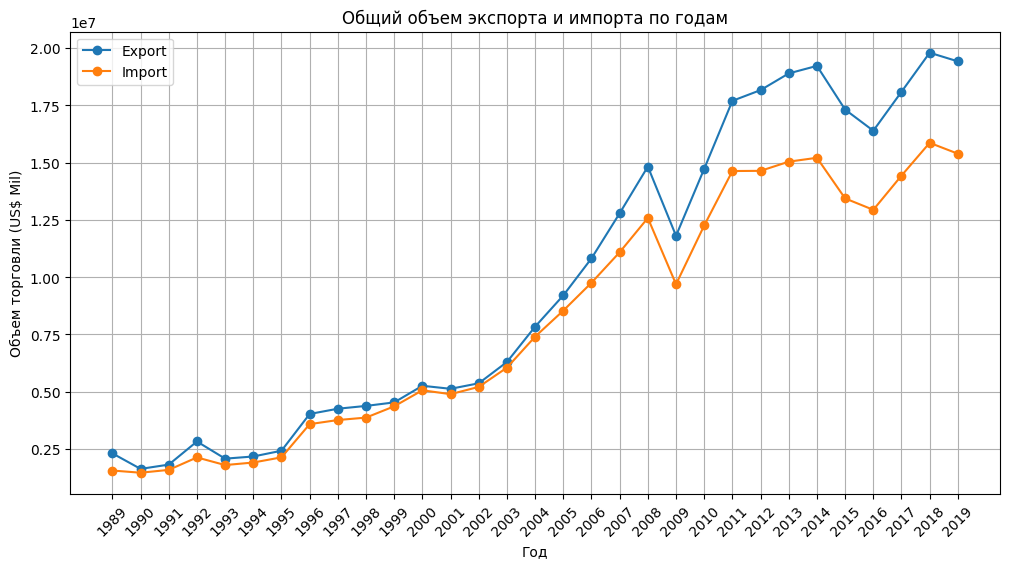

In [24]:

# Фильтруем данные
df_trade = df_imputed_new[df_imputed_new['Indicator Type'].isin(['Import', 'Export'])].copy()

# Суммируем данные
trade_summary = df_trade.groupby('Indicator Type')[years].sum().transpose()

# График
plt.figure(figsize=(12, 6))
plt.plot(trade_summary.index, trade_summary['Export'], label='Export', marker='o')
plt.plot(trade_summary.index, trade_summary['Import'], label='Import', marker='o')
plt.title('Общий объем экспорта и импорта по годам')
plt.xlabel('Год')
plt.ylabel('Объем торговли (US$ Mil)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

3. Определение доминирующего направления для каждой страны

In [26]:
# Фильтруем данные
df_trade = df_imputed_new[df_imputed_new['Indicator Type'].isin(['Import', 'Export'])]

# Суммируем значения по годам
df_trade['Total'] = df_trade[years].sum(axis=1)

# Группируем по 'Reporter' и 'Indicator Type'
trade_summary = df_trade.groupby(['Reporter', 'Indicator Type'])['Total'].sum().reset_index()

# Поворачиваем таблицу для сравнения импорта и экспорта
trade_pivot = trade_summary.pivot(index='Reporter', columns='Indicator Type', values='Total').fillna(0)

# Определяем, чего больше: импорта или экспорта
trade_pivot['More'] = np.where(trade_pivot['Export'] > trade_pivot['Import'], 'Export', 'Import')

# Выводим результаты
print(trade_pivot[['Import', 'Export', 'More']])


Indicator Type            Import        Export    More
Reporter                                              
Australia           8.862637e+06  1.317828e+07  Export
Belgium             1.927351e+07  1.999567e+07  Export
Bolivia             5.309861e+05  7.475192e+05  Export
Brazil              7.834777e+06  1.259903e+07  Export
China               6.219320e+07  1.025841e+08  Export
Italy               2.107965e+07  2.574091e+07  Export
Korea, Rep.         1.735999e+07  2.745842e+07  Export
Russian Federation  8.589790e+06  2.351241e+07  Export
Turkey              7.852741e+06  7.555630e+06  Import
United States       9.870566e+07  6.814264e+07  Import


<ipython-input-26-746f653f6aae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trade['Total'] = df_trade[years].sum(axis=1)


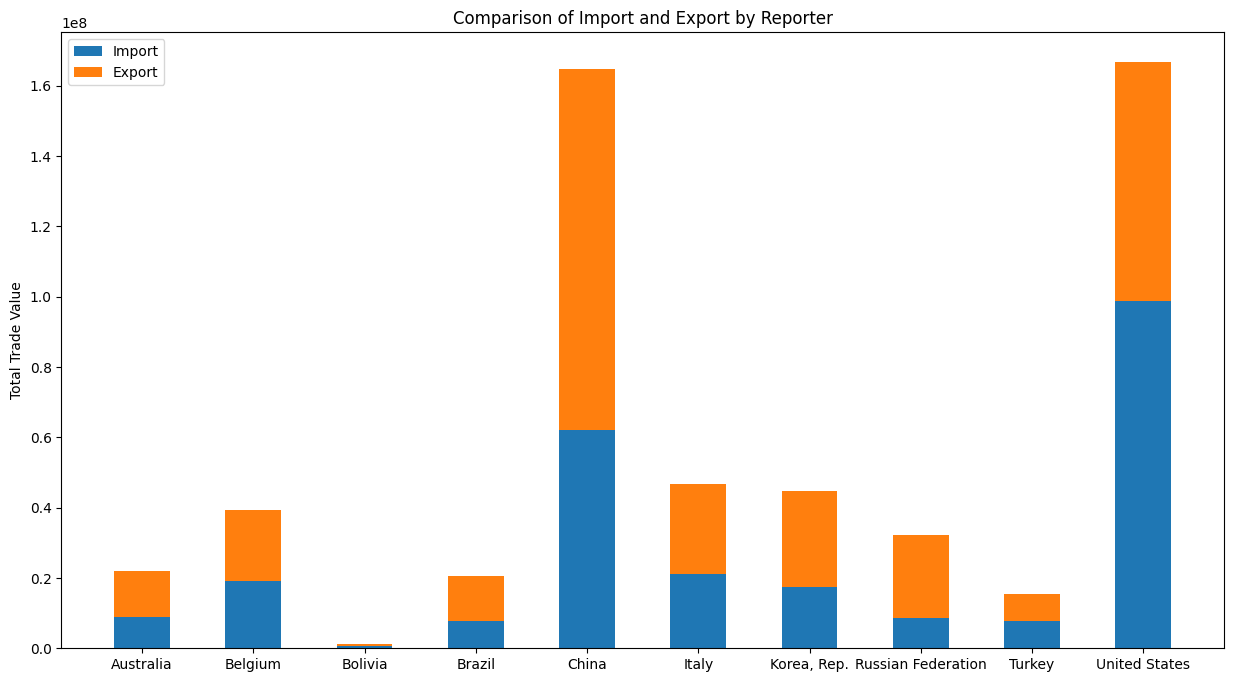

In [27]:
# Построение диаграммы
fig, ax = plt.subplots(figsize=(15, 8))
width = 0.5

reporters = trade_pivot.index
ax.bar(reporters, trade_pivot['Import'], width, label='Import')
ax.bar(reporters, trade_pivot['Export'], width, bottom=trade_pivot['Import'], label='Export')

ax.set_ylabel('Total Trade Value')
ax.set_title('Comparison of Import and Export by Reporter')
ax.legend()

#for i, (imp, exp) in enumerate(zip(trade_pivot['Import'], trade_pivot['Export'])):
 #   ax.text(i, imp / 2, f'{imp:.0f}', ha='center', color='black', weight='bold')
 #   ax.text(i, imp + exp / 2, f'{exp:.0f}', ha='center', color='black', weight='bold')

plt.show()

Итог: у 80% исследуемых стран объем экспорта превышает объем импорта. К таким странам относятся Австралия, Бельгия, Боливия, Бразилия, КНР, Италия, Южная Корея и Россия. У Турции и США, напротив, объем импортируемой продукции больше, чем экспортируемой.

4. Определение основного торгового партнера для каждой страны

In [28]:
# Исключаем партнера 'World'
df_partners = df_imputed_new[
    (df_imputed_new['Partner'].notnull()) &
    (df_imputed_new['Partner'] != '...') &
    (df_imputed_new['Partner'] != '') &
    (df_imputed_new['Partner'] != 'World')
]

partner_counts = df_partners.groupby(['Reporter', 'Partner']).size().reset_index(name='Counts')

# Находим наиболее часто встречающиеся значения
most_frequent_partners = partner_counts.loc[partner_counts.groupby('Reporter')['Counts'].idxmax()]

most_frequent_partners.reset_index(drop=True, inplace=True)

# Результаты
print("Основной торговый партнер:")
print(most_frequent_partners[['Reporter', 'Partner']])




Основной торговый партнер:
             Reporter        Partner
0           Australia          China
1             Belgium         France
2             Bolivia  United States
3              Brazil      Argentina
4               China          Japan
5               Italy        Germany
6         Korea, Rep.          Japan
7  Russian Federation        Belarus
8              Turkey          Italy
9       United States         Canada


Итог: можно предположить, что стабильность в торговых отношениях основывается на территориальной близости стран-участников, что объясняется сокращением издержек на логистику. Так, у Австралии торговый обмен происходит чаще с Китаем, у Бельгии - с Францией, у Боливии - с США, Бразилии - с Аргентиной, Китая и Южной Кореи - с Японией, России - с Республикой Беларусь, Турции - с Италией, США - с Канадой. Из этой логики выбиваются торговые отношения Италии и Германии, но наиболее вероятно, что основная причина в установлении льгот на таможенные пошлины между странами.

5. Объем выручки от экспорта. Наиболее прибыльные товары.

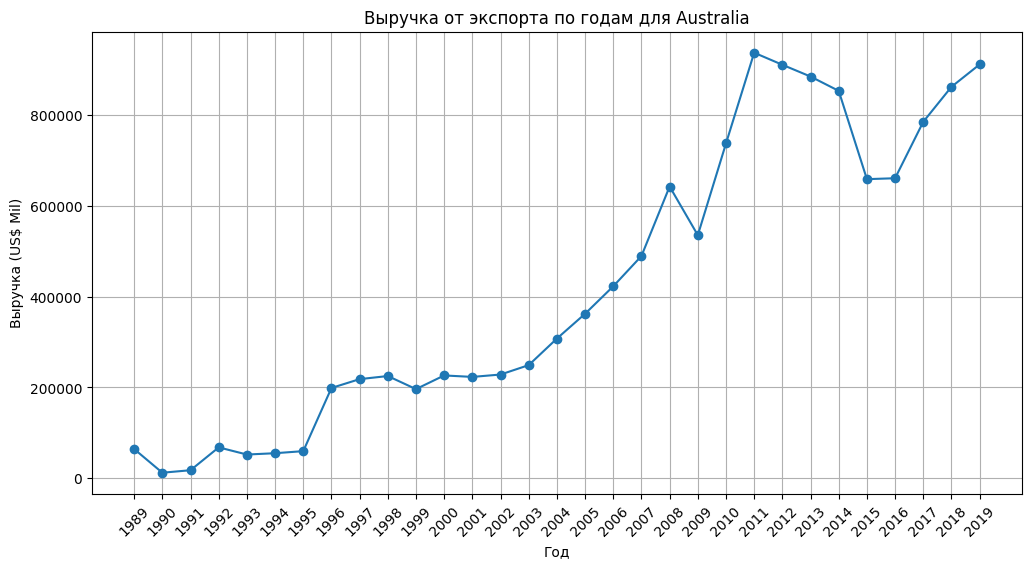

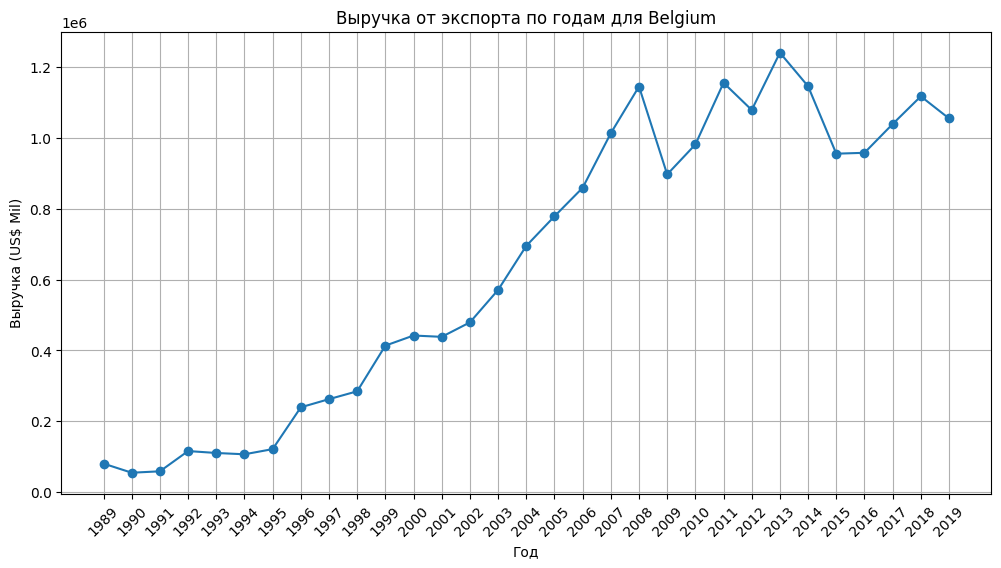

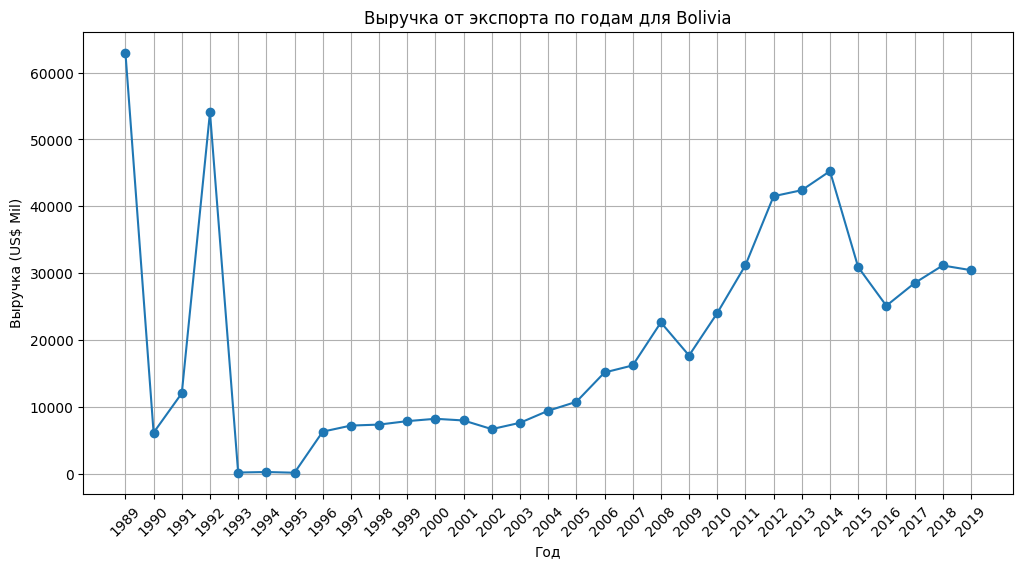

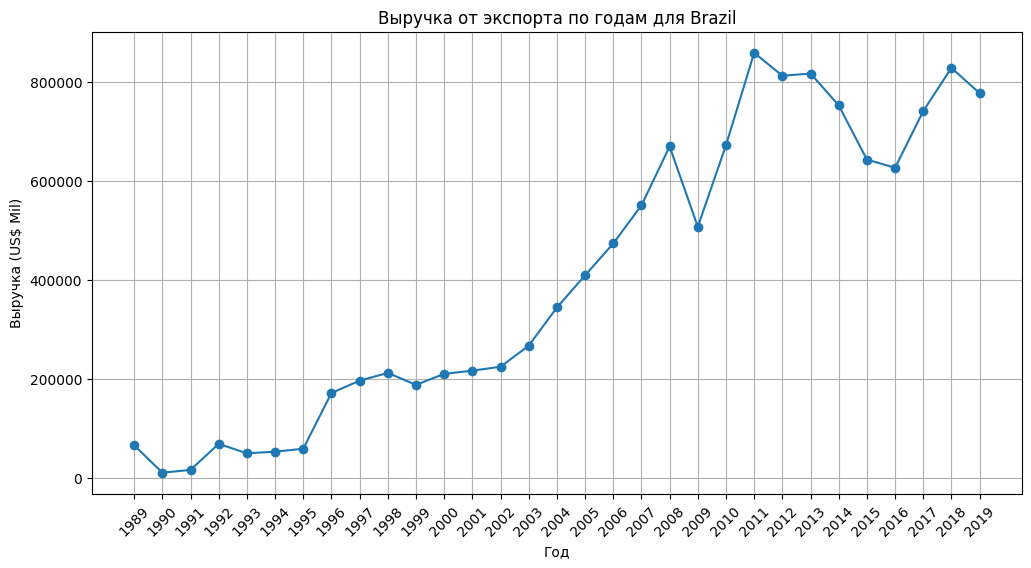

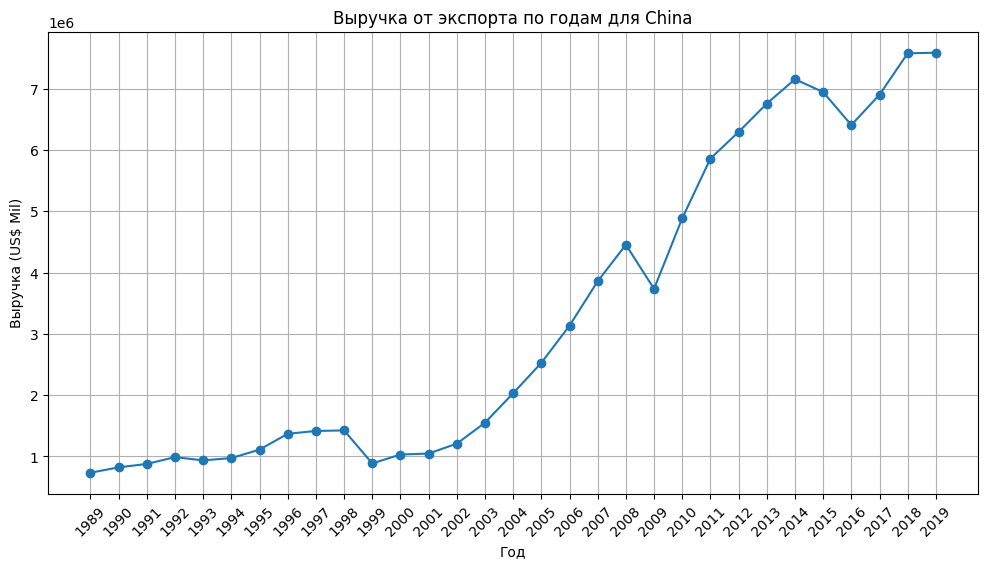

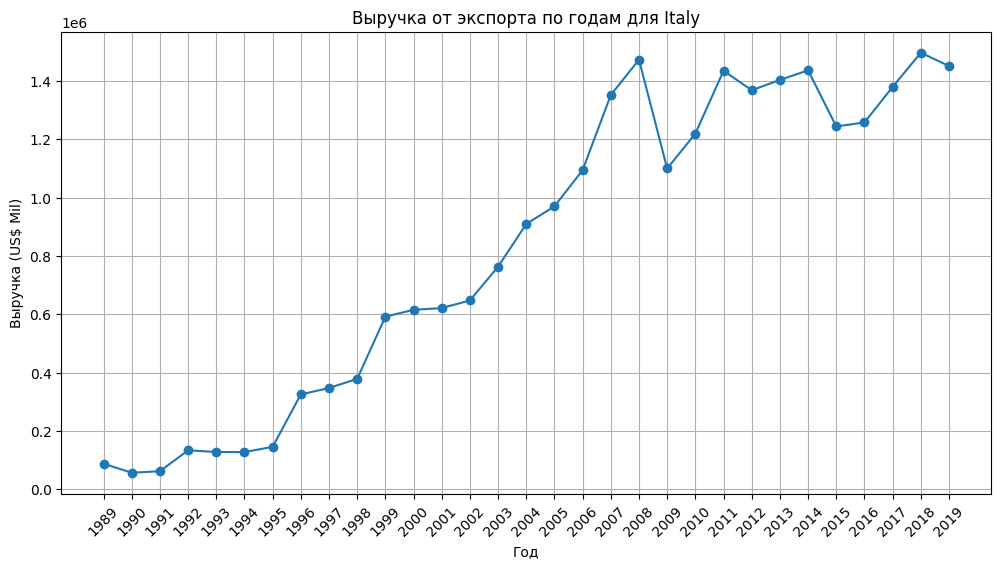

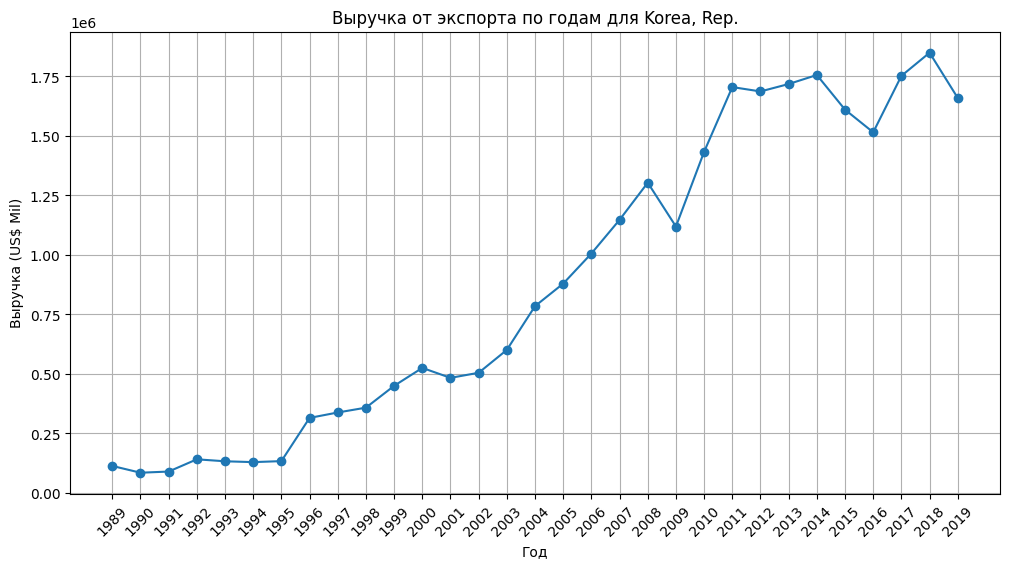

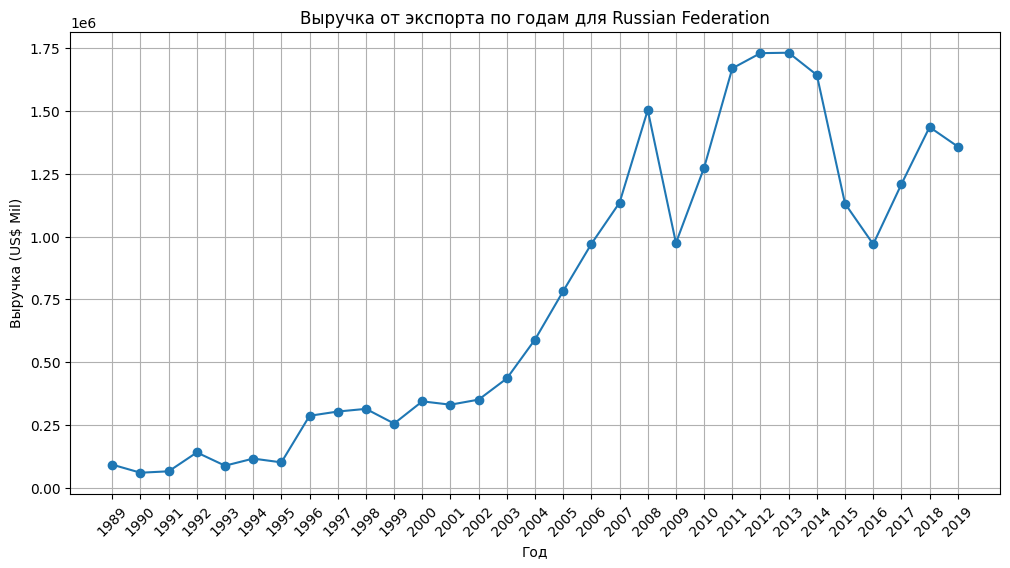

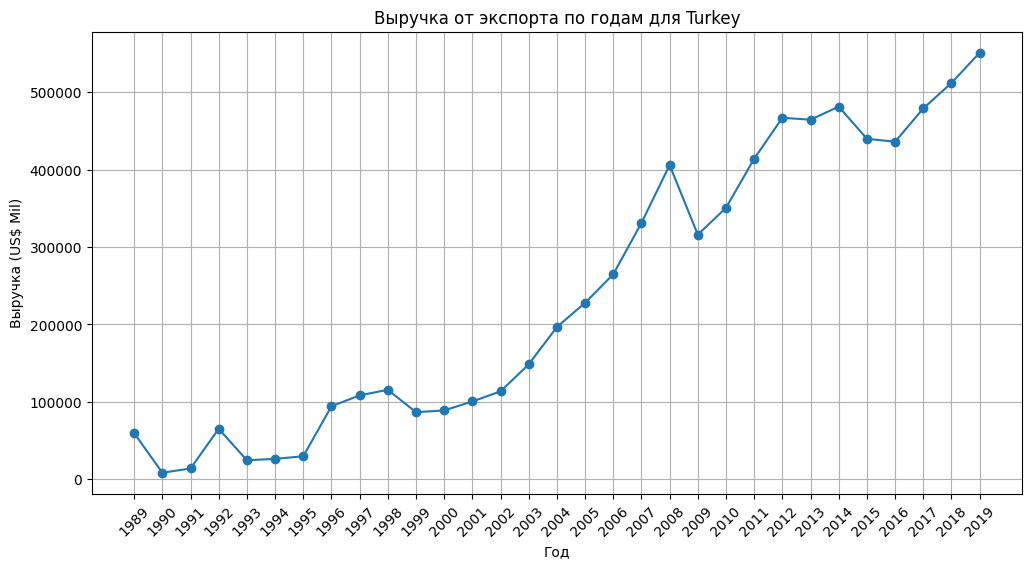

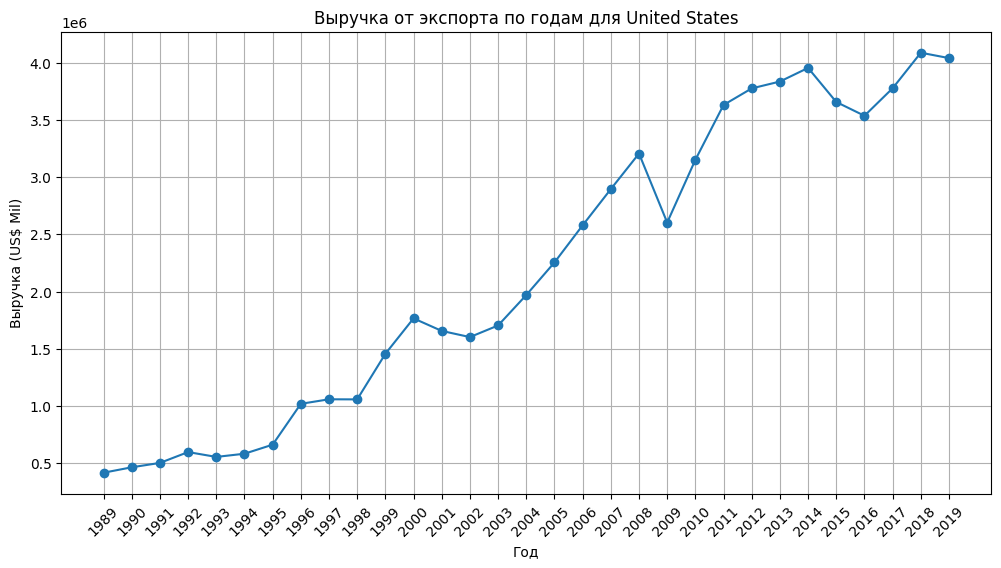

In [29]:
# Фильтруем данные по экспорту
df_exports = df_imputed_new[df_imputed_new['Indicator Type'] == 'Export']

# Исключаем строки, в которых указана доля
df_filtered = df_exports[~df_exports['Indicator'].str.contains('%', na=False)].copy()

countries = df_filtered['Reporter'].unique()


# Итерация по каждой стране для построения графика
for country in countries:
    country_data = df_filtered[df_filtered['Reporter'] == country]

    # Суммируем выручку по годам
    yearly_revenue = country_data[years].sum()

    # Проверяем, что данные не пустые
    if yearly_revenue.sum() > 0:
        # график
        plt.figure(figsize=(12, 6))
        plt.plot(years, yearly_revenue.values, marker='o')
        plt.title(f'Выручка от экспорта по годам для {country}')
        plt.xlabel('Год')
        plt.ylabel('Выручка (US$ Mil)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()


In [ ]:
# Исключаем 'All Products' и фильтруем данные
df_products = df_filtered[df_filtered['Product categories'] != 'All Products']

# Суммируем выручку по годам для каждого продукта
product_revenue = df_products.groupby('Product categories')[years].sum()

# Вычисляем общую выручку за все периоды
product_revenue['Total Revenue'] = product_revenue.sum(axis=1)

# Определяем топ-5 продуктов
top_5_products = product_revenue.sort_values(by='Total Revenue', ascending=False).head(5)

# Выводим топ-5 продуктов списком
print("Топ-5 товаров по общей выручке с 1989 г по 2019 г:")
for idx, (product, row) in enumerate(top_5_products.iterrows(), 1):
    total_rev = row['Total Revenue']
    print(f"{idx}. {product}: {total_rev:.2f} US$ Mil")


Топ-5 товаров по общей выручке с 1989 г по 2019 г:
1. Mach and Elec: 27881575.68 US$ Mil
2. Capital goods: 26014650.47 US$ Mil
3. Consumer goods: 21599254.34 US$ Mil
4. Intermediate goods: 12890435.76 US$ Mil
5. Raw materials: 10509250.49 US$ Mil


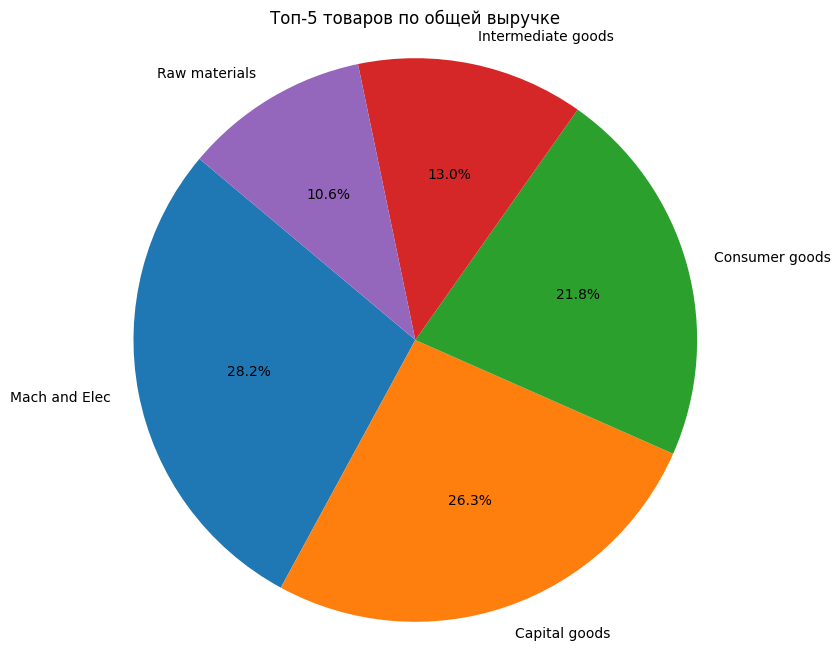

In [ ]:
#построим круговую диаграмму
labels = top_5_products.index
sizes = top_5_products['Total Revenue']


percentages = (sizes / sizes.sum()) * 100


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Топ-5 товаров по общей выручке')
plt.axis('equal')
plt.show()

Итог: динамика выручки исследуемых стран от экспорта в целом соответствует единому тренду: наиболее значимый рост выручки от экспорта происходит с 2000 по 2008 год, затем заметен спад ввиду экономического кризиса. После наблюдается рост и незначительное снижение в период 2014-2016 гг. Исключение составляет Боливия, по графику выручки которой видны выбросы в данных до 1993 года, но в период с 1993 года по 2019 г объем выручки соответствует тренду. Категория товаров, которая составляет наибольшую долю в мировом экспорте (28,2%), - машины и электроника. Также значительную долю составляют инвестиционные товары (товары, которые используются для расширения и поддержания производства, например, оборудование, станки) и потребительские товары (товары конечного потребления). В среднем в 2,5 раза относительно предыдущих категорий меньше доля промежуточных товаров (материалы для производства) и сырьевых товаров.

6. Топ 5 стран по выручке от экспорта полезных ископаемых.

In [31]:

# Фильтруем данные
df_minerals = df_filtered[
    (df_filtered['Product categories'] == 'Minerals')

]

# Суммируем выручку по годам для каждой страны
minerals_revenue = df_minerals.groupby('Reporter')[years].sum()

# Вычисляем общую выручку за все годы
minerals_revenue['Total Revenue'] = minerals_revenue.sum(axis=1)

# Топ-5 стран
top_5_countries_minerals = minerals_revenue.sort_values(by='Total Revenue', ascending=False).head(5)

# Результаты
print("Топ-5 стран по выручке от экспорта полезных ископаемых:")
print(top_5_countries_minerals['Total Revenue'])


Топ-5 стран по выручке от экспорта полезных ископаемых:
Reporter
Australia             869278.18000
Brazil                399816.56125
United States         158160.93000
China                  78184.83750
Russian Federation     71133.67750
Name: Total Revenue, dtype: float64


<ipython-input-34-9f95c3c0c62e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenues.values, y=countries, palette='viridis')


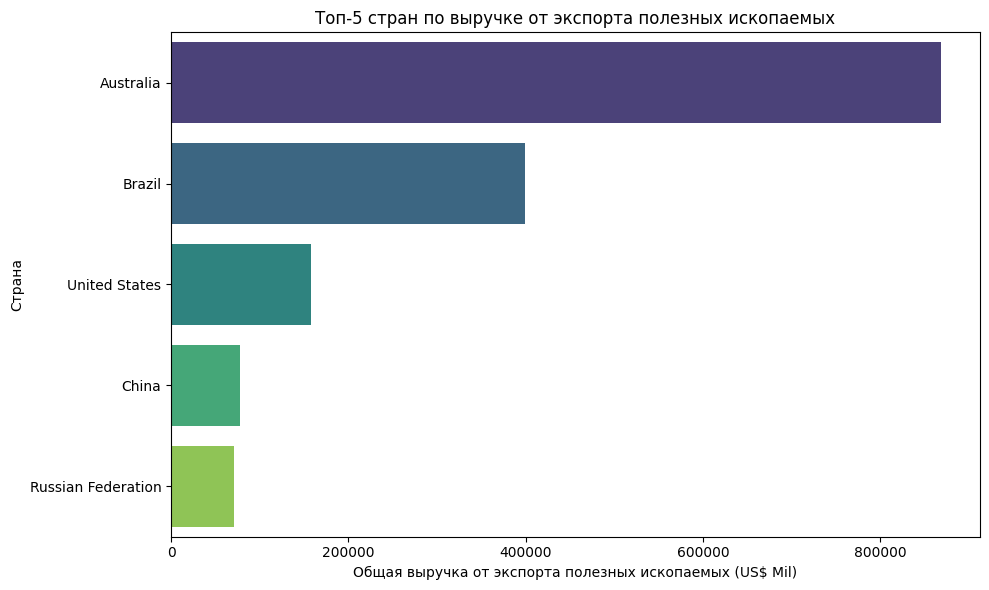

In [34]:
# Построим гистограмму
countries = top_5_countries_minerals.index
revenues = top_5_countries_minerals['Total Revenue']

plt.figure(figsize=(10, 6))
sns.barplot(x=revenues.values, y=countries, palette='viridis')

plt.xlabel('Общая выручка от экспорта полезных ископаемых (US$ Mil)')
plt.ylabel('Страна')
plt.title('Топ-5 стран по выручке от экспорта полезных ископаемых')
plt.tight_layout()


# Отображение графика
plt.show()

Итог: за исследуемый период наибольший объем выручки от экспорта полезных ископаемых приходится на Австралию. Почти половина от этого объема приходится на Бразилию. Шестая часть - на США. Объемы по выручке от экспорта полезных ископаемых Китая и России почти на одном уровне и совместно достигают объемов США.

7. Объем экспорта и импорта продуктов.

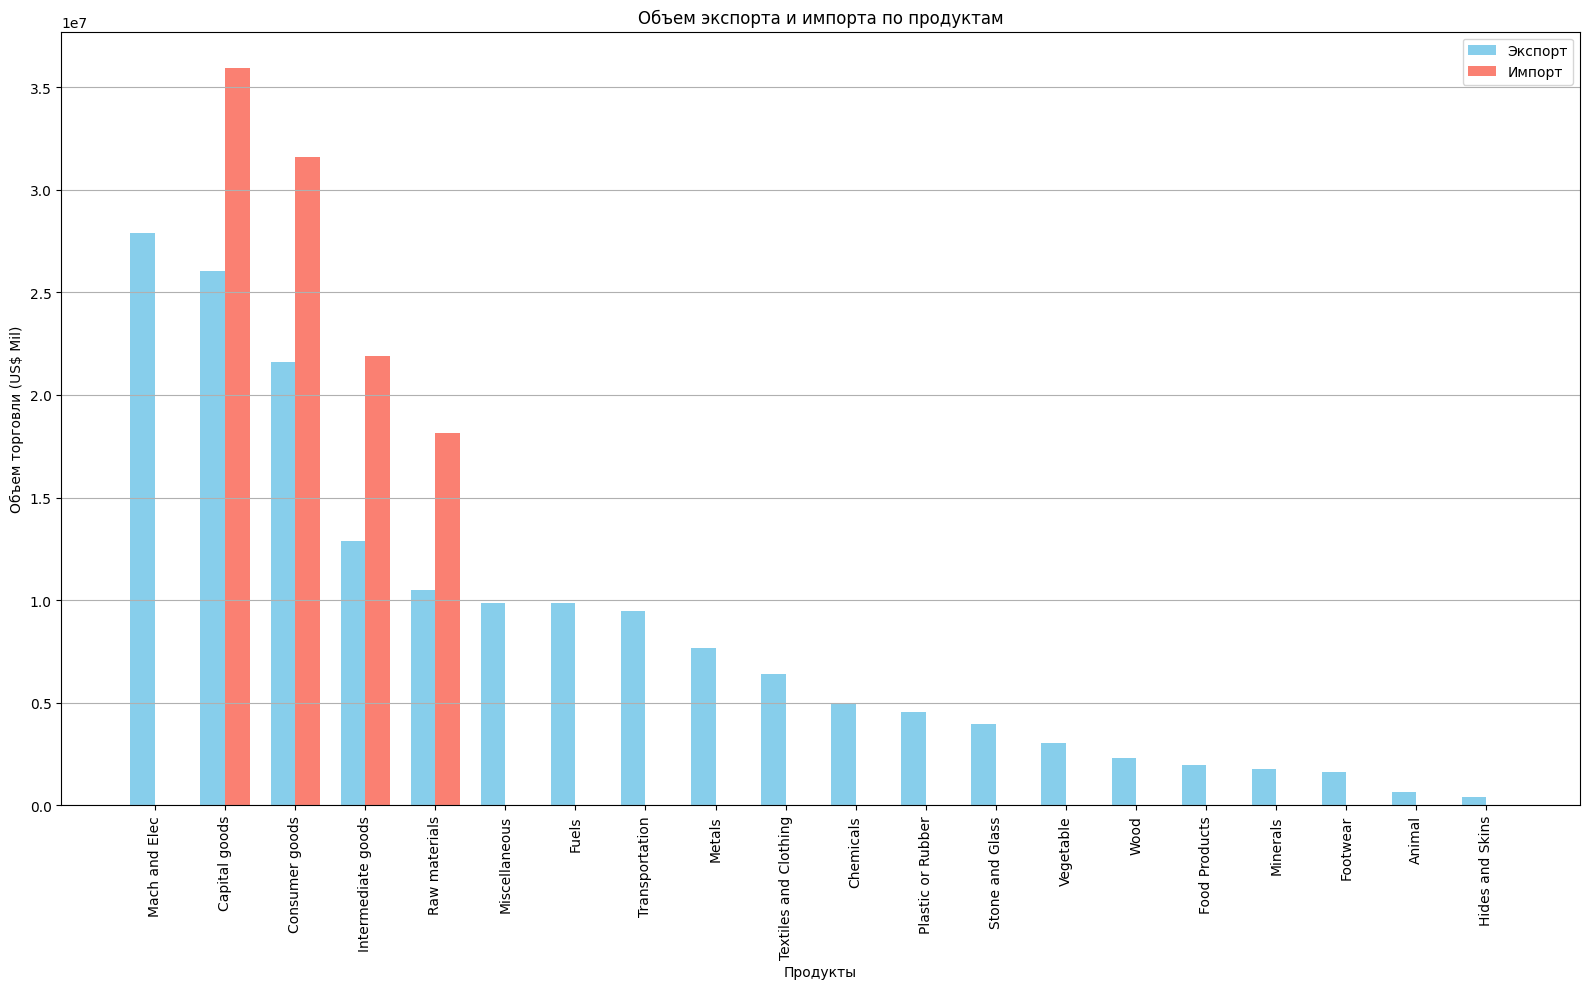

In [ ]:

# Фильтрация данных
df_products = df_imputed_new[
    (df_imputed_new['Product categories'] != 'All Products') &
    (df_imputed_new['Product categories'] != '...') &
    (df_imputed_new['Indicator'].notnull()) &
    (~df_imputed_new['Indicator'].str.contains('%', na=False))
]

# Группируем данные по 'Product categories' и 'Indicator Type' и суммируем по годам
product_trade = df_products.groupby(['Product categories', 'Indicator Type'])[years].sum()

# Вычисляем общую сумму по всем годам для каждого продукта и типа индикатора
product_trade['Total'] = product_trade.sum(axis=1)

# Сбрасываем индексы для удобства работы с DataFrame
product_trade_reset = product_trade.reset_index()

# Создаем сводную таблицу, чтобы получить отдельные столбцы для экспорта и импорта
pivot_table = product_trade_reset.pivot(index='Product categories', columns='Indicator Type', values='Total').fillna(0)
pivot_table = pivot_table.sort_values(by='Export', ascending=False)

# Получаем списки продуктов и соответствующие объемы экспорта и импорта
products = pivot_table.index.tolist()
export_values = pivot_table['Export'].values
import_values = pivot_table['Import'].values

# Определяем позиции на оси X
x = np.arange(len(products))
width = 0.35

# Построение гистограммы
plt.figure(figsize=(16, 10))


plt.bar(x - width/2, export_values, width, label='Экспорт', color='skyblue')
plt.bar(x + width/2, import_values, width, label='Импорт', color='salmon')

# Настройка осей и меток
plt.xlabel('Продукты')
plt.ylabel('Объем торговли (US$ Mil)')
plt.title('Объем экспорта и импорта по продуктам')
plt.xticks(x, products, rotation=90)
plt.legend()

plt.grid(axis='y')
plt.tight_layout()

# График
plt.show()



Итог: только 4 категории товаров входят в группу импортируемых странами: инвестиционные, потребительские, промежуточные и сырьевые товары. Помимо топа 5 категорий товаров, поступающих на экспорт, значимую долю в экспорте между исследуемыми странами также занимают топливо, транспорт и металлы. Наименьшую долю в экспорте занимают сырье для кожевенных производств и скот.

8. Прогноз развития выручки от экспорта на 5 лет.

Топ-3 страны по выручке от экспорта:
Reporter
China            1.023600e+08
United States    6.791615e+07
Korea, Rep.      2.721782e+07
Name: Total Revenue, dtype: float64

Страна: China
Период обучения: 1989 - 2012
Период валидации: 2013 - 2019
MAE: 2267024.03
RMSE: 2728820.53


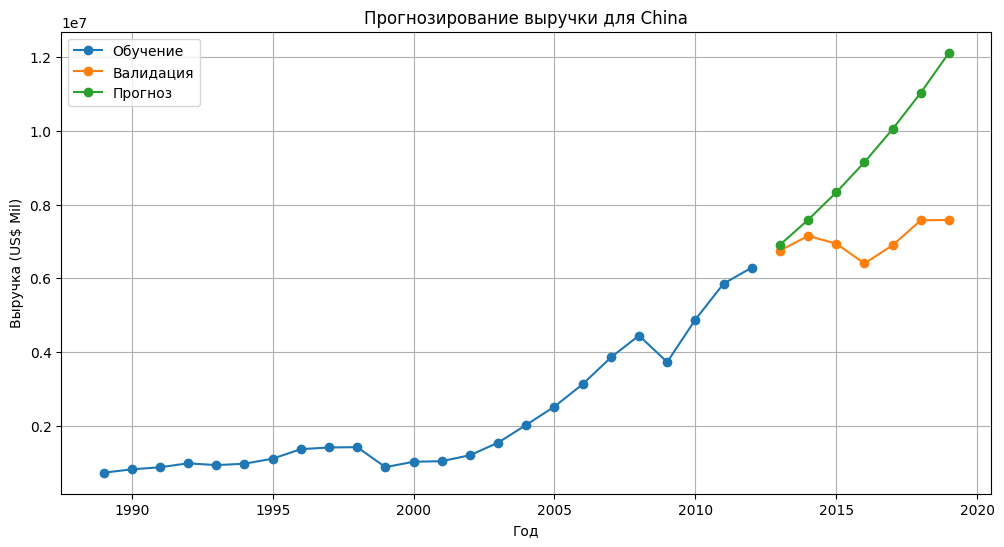

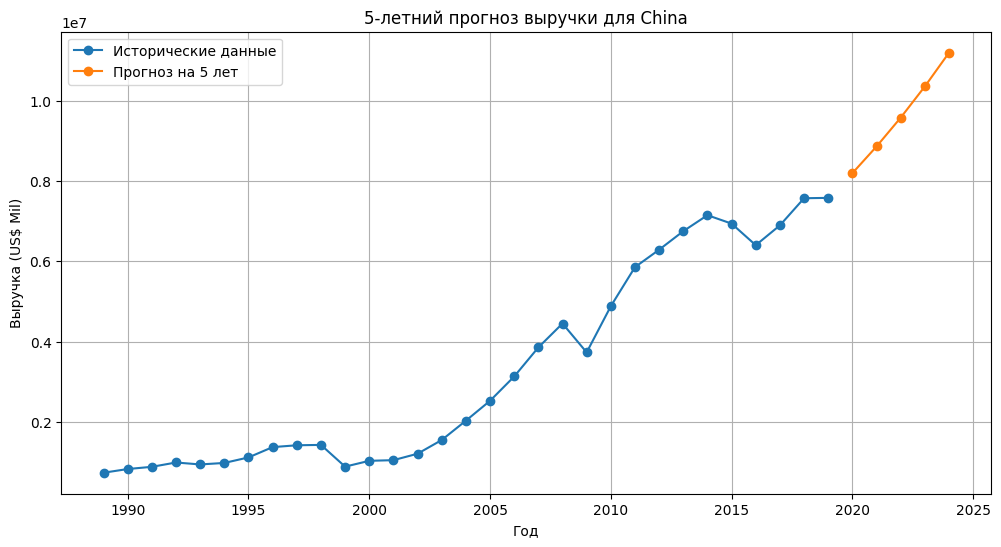

Прогноз выручки на следующие 5 лет:
             Год  Прогноз выручки
2020-01-01  2020       8196821.73
2021-01-01  2021       8862100.87
2022-01-01  2022       9581376.10
2023-01-01  2023      10359029.90
2024-01-01  2024      11199800.47

Страна: United States
Период обучения: 1989 - 2012
Период валидации: 2013 - 2019
MAE: 1809466.57
RMSE: 2074951.25


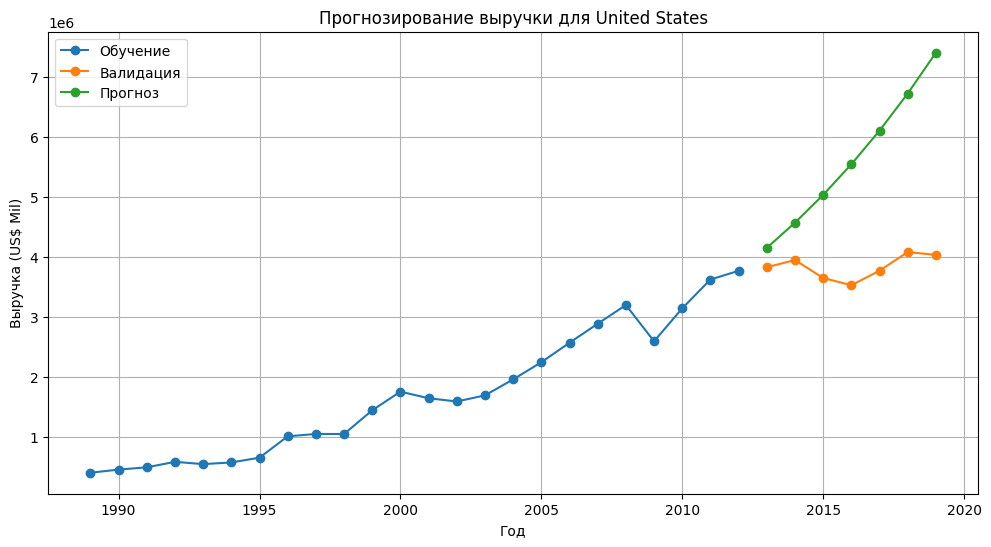

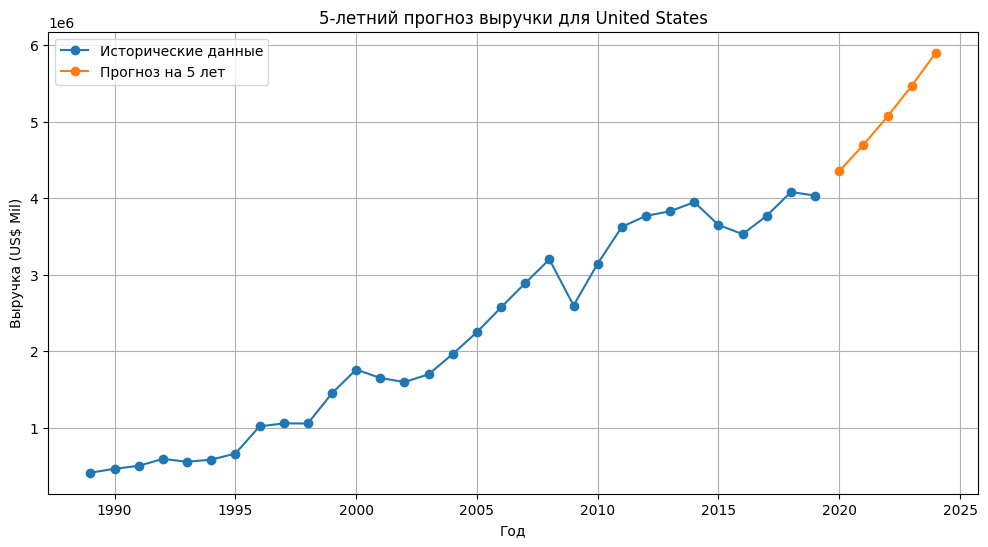

Прогноз выручки на следующие 5 лет:
             Год  Прогноз выручки
2020-01-01  2020       4353665.29
2021-01-01  2021       4697875.87
2022-01-01  2022       5069300.51
2023-01-01  2023       5470090.82
2024-01-01  2024       5902568.52

Страна: Korea, Rep.
Период обучения: 1989 - 2012
Период валидации: 2013 - 2019
MAE: 1183831.81
RMSE: 1435356.01


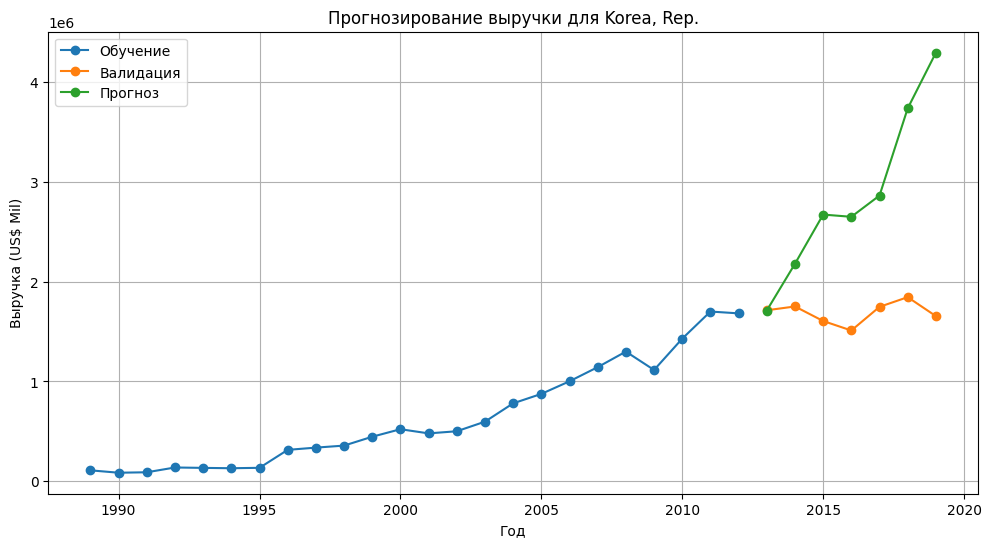

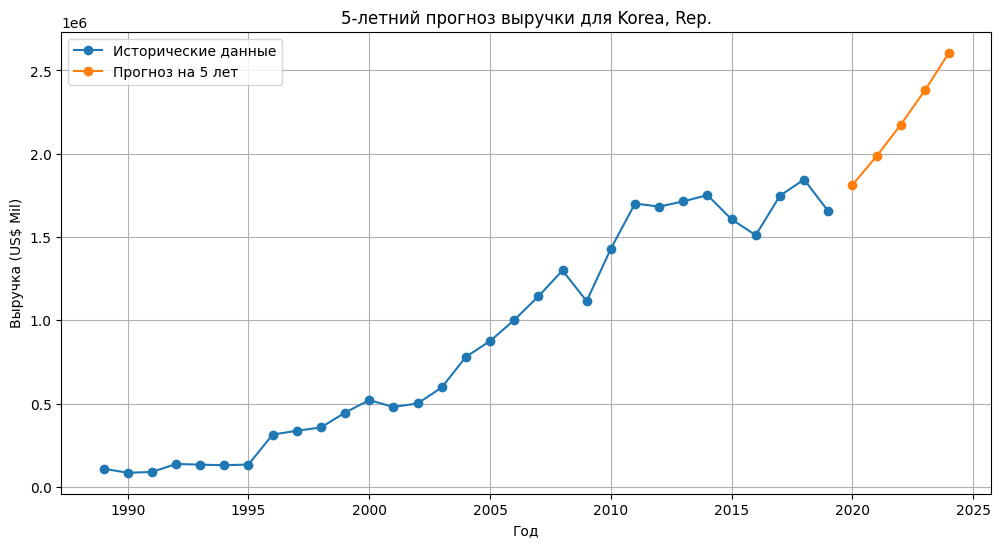

Прогноз выручки на следующие 5 лет:
             Год  Прогноз выручки
2020-01-01  2020       1812232.85
2021-01-01  2021       1984537.58
2022-01-01  2022       2173224.82
2023-01-01  2023       2379852.19
2024-01-01  2024       2606125.42


In [ ]:

import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Фильтрация данных
df_perspect = df_imputed_new[
    (df_imputed_new['Product categories'] != '...') &
    (~df_imputed_new['Indicator'].str.contains('%', na=False))
]

#  Определение топ-3 стран по выручке от экспорта
df_exports = df_perspect[df_perspect['Indicator Type'] == 'Export']

# Суммируем выручку по странам
country_export_revenue = df_exports.groupby('Reporter')[years].sum()
country_export_revenue['Total Revenue'] = country_export_revenue.sum(axis=1)

# Топ-3 страны по общей выручке
top_3_countries = country_export_revenue.sort_values(by='Total Revenue', ascending=False).head(3)
print("Топ-3 страны по выручке от экспорта:")
print(top_3_countries['Total Revenue'])

# Прогнозирование для каждой страны
for country in top_3_countries.index:
    print(f"\nСтрана: {country}")
    # Получаем данные по стране
    country_data = df_exports[df_exports['Reporter'] == country]
    country_revenue = country_data[years].sum()

    # Преобразуем данные в формат временного ряда
    ts = pd.Series(country_revenue.values, index=pd.to_datetime(years, format='%Y'))

    # Разделение на обучающую и валидационную выборки
    split_ratio = 0.8  # 80% данных для обучения, 20% для валидации
    split_point = int(len(ts) * split_ratio)
    ts_train = ts.iloc[:split_point]
    ts_valid = ts.iloc[split_point:]

    print(f"Период обучения: {ts_train.index.year[0]} - {ts_train.index.year[-1]}")
    print(f"Период валидации: {ts_valid.index.year[0]} - {ts_valid.index.year[-1]}")

    # Применяем логарифмическое преобразование, поскольку результаты предыдущих запусков модели показали нестабильную дисперсию
    ts_train_log = np.log(ts_train)
    ts_valid_log = np.log(ts_valid)

    # Обучаем модель ARIMA на логарифмически преобразованных данных
    model = pm.auto_arima(ts_train_log, seasonal=False, stepwise=True, suppress_warnings=True)
    model_fit = model.fit(ts_train_log)

    # Прогнозирование на период валидации
    forecast_log = model_fit.predict(n_periods=len(ts_valid_log))

    # Обратное преобразование прогнозных значений
    forecast = np.exp(forecast_log)

    # Оценка точности модели
    mae = mean_absolute_error(ts_valid, forecast)
    rmse = np.sqrt(mean_squared_error(ts_valid, forecast))
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

    # Построение графика обучения и валидации
    plt.figure(figsize=(12, 6))
    plt.plot(ts_train.index.year, ts_train.values, label='Обучение', marker='o')
    plt.plot(ts_valid.index.year, ts_valid.values, label='Валидация', marker='o')
    plt.plot(ts_valid.index.year, forecast, label='Прогноз', marker='o')
    plt.title(f'Прогнозирование выручки для {country}')
    plt.xlabel('Год')
    plt.ylabel('Выручка (US$ Mil)')
    plt.legend()
    plt.grid(True)
    plt.show()


    # Обучаем модель на всех данных
    ts_full_log = np.log(ts)
    model_full = pm.auto_arima(ts_full_log, seasonal=False, stepwise=True, suppress_warnings=True)
    model_full_fit = model_full.fit(ts_full_log)

    # Прогнозируем на 5 лет вперед
    forecast_log_future = model_full_fit.predict(n_periods=5)
    forecast_future = np.exp(forecast_log_future)

    # Создаем индекс для будущих периодов
    last_year = ts.index.year[-1]
    future_years = [str(last_year + i) for i in range(1, 6)]
    future_index = pd.to_datetime(future_years, format='%Y')

    # Построение графика прогноза
    plt.figure(figsize=(12, 6))
    plt.plot(ts.index.year, ts.values, label='Исторические данные', marker='o')
    plt.plot(future_index.year, forecast_future, label='Прогноз на 5 лет', marker='o')
    plt.title(f'5-летний прогноз выручки для {country}')
    plt.xlabel('Год')
    plt.ylabel('Выручка (US$ Mil)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Вывод прогнозных значений
    forecast_df = pd.DataFrame({
        'Год': future_index.year,
        'Прогноз выручки': forecast_future.round(2)
    })
    print("Прогноз выручки на следующие 5 лет:")
    print(forecast_df)


In [ ]:
#проверим стационарность временного ряда с помощью теста Дики-Фуллера
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts_train_log)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -3.518152
p-value: 0.007533


Итог: в процессе обучения было опробовано также экспоненциальное сглаживание, но по результам, MAE и RMSE оказался еще выше. Поэтому был выбран метод ARIMA с автоматическим подбором параметров, поскольку в данных нет ярко выраженной сезонности.

---


Данные по прогнозу для Китая:

*   2020:       8196821.73
*   2021:       8862100.87
*   2022:       9581376.10
*   2023:     10359029.90
*   2024:      11199800.47

 Данные по прогнозу для США:

*   2020:       4353665.29
*   2021:       4697875.87
*   2022:       5069300.51
*   2023:       5470090.82
*   2024:       5902568.52

Данные по прогнозу для Южной Кореи:

*   2020:       1812232.85
*   2021:       1984537.58
*   2022:       2173224.82
*   2023:      2379852.19
*   2024:      2606125.42
     

In [ ]:
9. Прогноз экспортера продуктов из категории Food Products на 5 лет.

Период обучения: 1989 - 2012
Период валидации: 2013 - 2019
MAE на валидации: 22427.18
RMSE на валидации: 27534.84


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


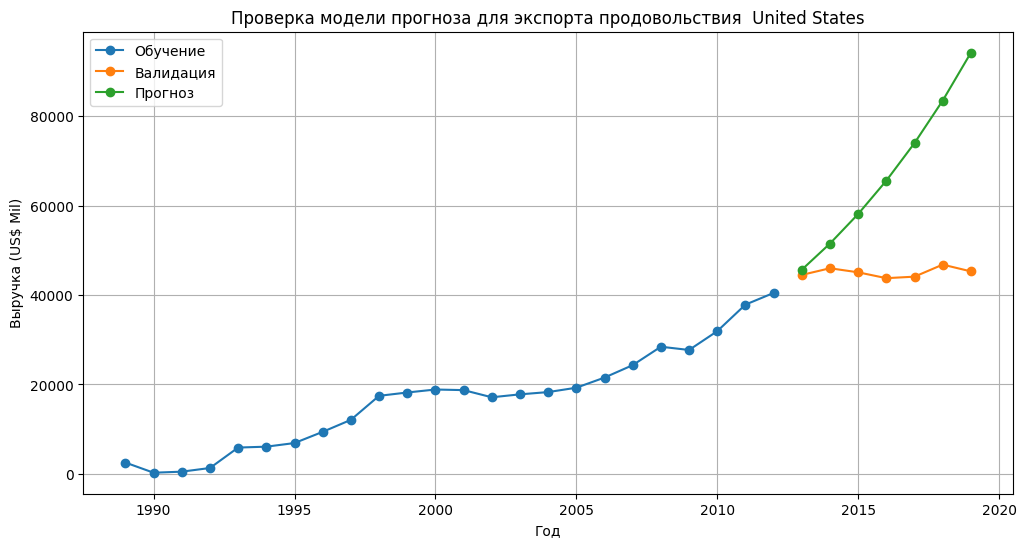

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)



Прогноз выручки от экспорта продовольствия на 5 лет:
             Год  Прогноз выручки
2020-01-01  2020     49855.176024
2021-01-01  2021     54895.303474
2022-01-01  2022     60444.964471
2023-01-01  2023     66555.670498
2024-01-01  2024     73284.140610


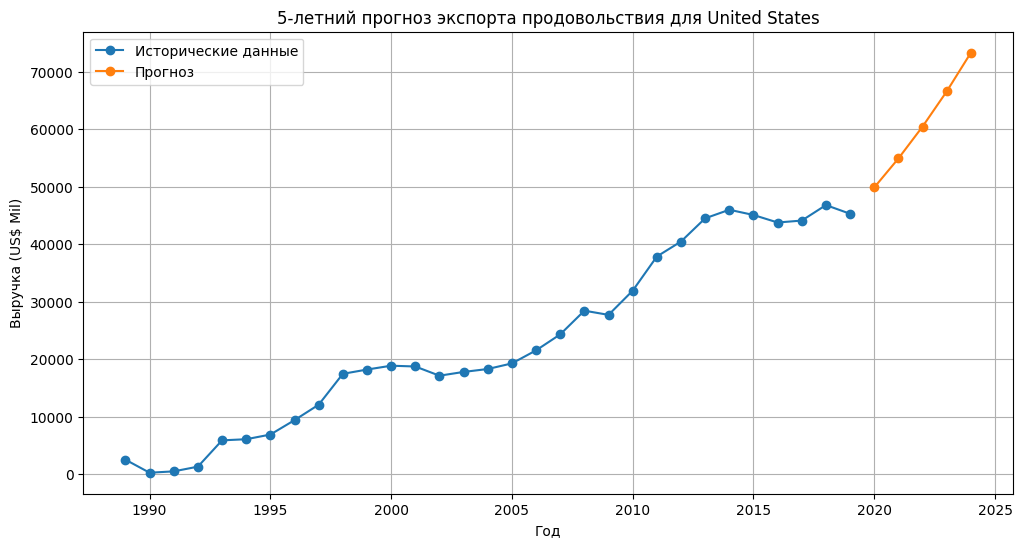

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Фильтруем данные
df_food = df_perspect[
    (df_perspect['Indicator Type'] == 'Export') &
    (df_perspect['Product categories'] == 'Food Products')
]

# Суммирование выручки по странам
food_revenue = df_food.groupby('Reporter')[years].sum()

# Вычисление общей выручки за все годы для каждой страны
food_revenue['Total Revenue'] = food_revenue.sum(axis=1)

# Определение страны с наибольшей общей выручкой
top_country_food = food_revenue.sort_values(by='Total Revenue', ascending=False).head(1)
country = top_country_food.index[0]


#  Получение временного ряда данных для этой страны
country_data = df_food[df_food['Reporter'] == country]
country_revenue = country_data[years].sum()

# Преобразование данных в формат временного ряда
ts = pd.Series(country_revenue.values, index=pd.to_datetime(years, format='%Y'))

#  Разделение временного ряда на обучающую и валидационную выборки
split_ratio = 0.8  # 80% обучения, 20% валидации
split_point = int(len(ts) * split_ratio)
ts_train = ts.iloc[:split_point]
ts_valid = ts.iloc[split_point:]

print(f"Период обучения: {ts_train.index.year[0]} - {ts_train.index.year[-1]}")
print(f"Период валидации: {ts_valid.index.year[0]} - {ts_valid.index.year[-1]}")

#  Применение логарифмического преобразования
ts_train_log = np.log(ts_train)
ts_valid_log = np.log(ts_valid)

#  Построение модели экспоненциального сглаживания на преобразованных данных
model = ExponentialSmoothing(ts_train_log, trend='add', seasonal=None)
model_fit = model.fit(optimized=True)

#  Проверка модели на валидационной выборке
forecast_log = model_fit.forecast(steps=len(ts_valid_log))
forecast = np.exp(forecast_log)  # Обратное преобразование

# Оценка точности модели
mae = mean_absolute_error(ts_valid, forecast)
rmse = np.sqrt(mean_squared_error(ts_valid, forecast))
print(f"MAE на валидации: {mae:.2f}")
print(f"RMSE на валидации: {rmse:.2f}")

# Построение графика обучения, валидации и прогноза
plt.figure(figsize=(12, 6))
plt.plot(ts_train.index.year, ts_train.values, label='Обучение', marker='o')
plt.plot(ts_valid.index.year, ts_valid.values, label='Валидация', marker='o')
plt.plot(ts_valid.index.year, forecast, label='Прогноз', marker='o')
plt.title(f"Проверка модели прогноза для экспорта продовольствия")
plt.xlabel('Год')
plt.ylabel('Выручка (US$ Mil)')
plt.legend()
plt.grid(True)
plt.show()

#  Прогнозирование выручки на следующие 5 лет
# Обучаем модель на полном наборе данных
ts_full_log = np.log(ts)
model_full = ExponentialSmoothing(ts_full_log, trend='add', seasonal=None)
model_full_fit = model_full.fit(optimized=True)

# Прогнозируем на 5 лет вперед
forecast_log_future = model_full_fit.forecast(steps=5)
forecast_future = np.exp(forecast_log_future)

# Создаем индекс для будущих лет
last_year = ts.index.year[-1]
future_years = [str(last_year + i) for i in range(1, 6)]
future_index = pd.to_datetime(future_years, format='%Y')

# Вывод прогнозных значений и визуализация
forecast_df = pd.DataFrame({
    'Год': future_index.year,
    'Прогноз выручки': forecast_future
})
print("\nПрогноз выручки от экспорта продовольствия на 5 лет:")
print(forecast_df)

# Построение графика исторических данных и прогноза
plt.figure(figsize=(12, 6))
plt.plot(ts.index.year, ts.values, label='Исторические данные', marker='o')
plt.plot(future_index.year, forecast_future, label='Прогноз', marker='o')
plt.title(f"5-летний прогноз экспорта продовольствия")
plt.xlabel('Год')
plt.ylabel('Выручка (US$ Mil)')
plt.legend()
plt.grid(True)
plt.show()


Итог: Рассчитан прогноз для США - основного экспортера продовольствия среди исследуемых стран. В данном случае был использован метод экспоненциального сглаживания, поскольку на данных экспорта продовольственных товаров уже имеется некоторая сезонность.
Прогноз экпорта продовольствия для США:


*    2020: 49855.176024
*   2021: 54895.303474
*   2022: 60444.964471
*   2023: 66555.670498
*   2024: 73284.140610
